# Linear Regression in numpy

In [49]:
import numpy as np
import matplotlib.pyplot as plt

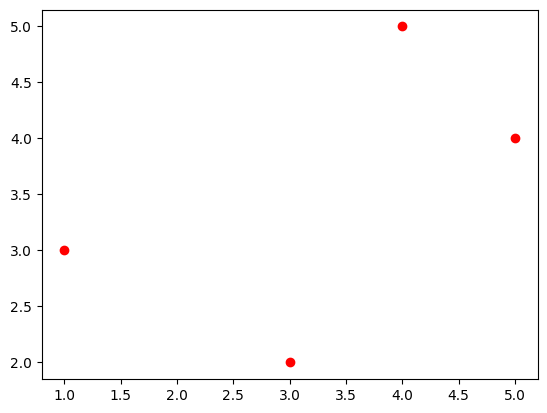

In [50]:
x = np.array([1, 3, 4, 5])
y = np.array([3, 2, 5, 4])
plt.scatter(x, y, color='r')

In [51]:
np.ones(4)

array([1., 1., 1., 1.])

In [52]:
X = np.array([np.ones(4), x]).T
X

array([[1., 1.],
       [1., 3.],
       [1., 4.],
       [1., 5.]])

In [53]:
Y = y.reshape(4,1)
Y

array([[3],
       [2],
       [5],
       [4]])

In [54]:
beta_hat, residuals, rank, s = np.linalg.lstsq(X, Y, rcond=None)
beta_hat

array([[2.2],
       [0.4]])

In [55]:
def predict(xi):
    return np.matmul( np.array([1, xi]), beta_hat)

In [56]:
predict(1000.05)

array([402.22])

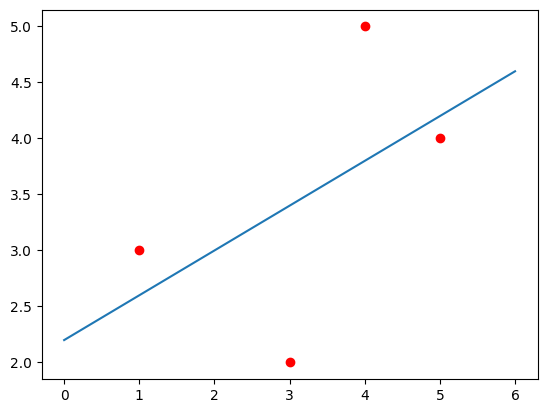

In [57]:
plt.scatter(x, y, color='r')
inputs = [0, 1, 2, 3, 4, 5, 6]
outputs = [predict(xi) for xi in inputs]
plt.plot(inputs, outputs)

In [58]:
np.array([[1, 2],[1,2.5],[1,1.75]])

array([[1.  , 2.  ],
       [1.  , 2.5 ],
       [1.  , 1.75]])

In [59]:
np.matmul( np.array([[1, 2],[1,2.5],[1,1.75]]), beta_hat)

array([[3. ],
       [3.2],
       [2.9]])

# Data Set / Pandas Example

In [60]:
import pandas as pd
df = pd.read_csv('grades.csv')
df

,name,q1,q2,q3,t1,t2,final
0,amit,4,2,5,87,23,59.0
1,beauregard,3,4,2,78,34,67.0
2,cecily,3,5,3,34,40,NaN
3,deshaun,5,5,5,40,39,69.0
4,esmeralda,4,3,4,37,34,55.0


In [61]:
df.dropna(axis=0,how='any')

,name,q1,q2,q3,t1,t2,final
0,amit,4,2,5,87,23,59.0
1,beauregard,3,4,2,78,34,67.0
3,deshaun,5,5,5,40,39,69.0
4,esmeralda,4,3,4,37,34,55.0


In [62]:
# there is a nan value ... need to do something with it
df = df.dropna(axis=0,how='any')
df

# note that the slice keeps the original indexing

,name,q1,q2,q3,t1,t2,final
0,amit,4,2,5,87,23,59.0
1,beauregard,3,4,2,78,34,67.0
3,deshaun,5,5,5,40,39,69.0
4,esmeralda,4,3,4,37,34,55.0


In [63]:
df.reset_index(drop=True, inplace=True)
df

,name,q1,q2,q3,t1,t2,final
0,amit,4,2,5,87,23,59.0
1,beauregard,3,4,2,78,34,67.0
2,deshaun,5,5,5,40,39,69.0
3,esmeralda,4,3,4,37,34,55.0


In [64]:
df.dtypes

name      object
q1         int64
q2         int64
q3         int64
t1         int64
t2         int64
final    float64
dtype: object

In [65]:
df_numeric = df.select_dtypes(np.number)
df_numeric

,q1,q2,q3,t1,t2,final
0,4,2,5,87,23,59.0
1,3,4,2,78,34,67.0
2,5,5,5,40,39,69.0
3,4,3,4,37,34,55.0


In [66]:
X = df_numeric.drop(columns='final')
X

,q1,q2,q3,t1,t2
0,4,2,5,87,23
1,3,4,2,78,34
2,5,5,5,40,39
3,4,3,4,37,34


In [67]:
X = pd.concat([pd.DataFrame({'intercept' :np.ones(4)}),X], axis=1)
X

,intercept,q1,q2,q3,t1,t2
0,1.0,4,2,5,87,23
1,1.0,3,4,2,78,34
2,1.0,5,5,5,40,39
3,1.0,4,3,4,37,34


In [68]:
# X.insert(0,'intercept',np.ones(4))
# X

In [69]:
y = df_numeric['final']
y

0    59.0
1    67.0
2    69.0
3    55.0
Name: final, dtype: float64

In [70]:
beta_hat, residuals, rank, s = np.linalg.lstsq(X,y,rcond=None)
beta_hat

array([-0.28891963,  1.10624344,  3.61590521,  1.16942108,  0.28851659,
        0.72539506])

In [71]:
X.columns

Index(['intercept', 'q1', 'q2', 'q3', 't1', 't2'], dtype='object')

In [72]:
X

,intercept,q1,q2,q3,t1,t2
0,1.0,4,2,5,87,23
1,1.0,3,4,2,78,34
2,1.0,5,5,5,40,39
3,1.0,4,3,4,37,34


In [73]:
np.matmul(X, beta_hat)

0    59.0
1    67.0
2    69.0
3    55.0
dtype: float64

In [74]:
df

,name,q1,q2,q3,t1,t2,final
0,amit,4,2,5,87,23,59.0
1,beauregard,3,4,2,78,34,67.0
2,deshaun,5,5,5,40,39,69.0
3,esmeralda,4,3,4,37,34,55.0


In [75]:
df['predicted'] = np.matmul(X, beta_hat)
df

/var/folders/0r/lprjchvd593dyrpzsrg6jjrm0000gn/T/ipykernel_4199/1638625770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted'] = np.matmul(X, beta_hat)


,name,q1,q2,q3,t1,t2,final,predicted
0,amit,4,2,5,87,23,59.0,59.0
1,beauregard,3,4,2,78,34,67.0,67.0
2,deshaun,5,5,5,40,39,69.0,69.0
3,esmeralda,4,3,4,37,34,55.0,55.0


In [76]:
df = pd.read_csv('Fish.csv')
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [77]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [106]:
# pd.get_dummies?
_ = pd.get_dummies(df['Species'], prefix='Species')

In [107]:
X = pd.concat([ _ ,df.drop(columns=['Species'])],axis=1)
X.head()

,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Weight,Length1,Length2,Length3,Height,Width
0,1,0,0,0,0,0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,0,0,0,0,0,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,0,0,0,0,0,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,0,0,0,0,0,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,0,0,0,0,0,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [108]:
y = df['Weight']
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [109]:
X.corr('pearson')

,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Weight,Length1,Length2,Length3,Height,Width
Species_Bream,1.000000,-0.144840,-0.391741,-0.183825,-0.201526,-0.165083,-0.105209,0.326795,0.216380,0.233391,0.327170,0.772443,0.319347
Species_Parkki,-0.144840,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988,-0.186034,-0.205732,-0.205957,-0.198718,-0.000547,-0.194147
Species_Perch,-0.391741,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018,-0.033240,-0.037845,-0.036090,-0.105478,-0.191405,0.144021
Species_Pike,-0.183825,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519,0.310641,0.563514,0.552780,0.522894,-0.101810,0.137722
Species_Roach,-0.201526,-0.103413,-0.279694,-0.131247,1.000000,-0.117866,-0.075117,-0.261784,-0.213250,-0.218048,-0.205072,-0.202076,-0.171465
Species_Smelt,-0.165083,-0.084712,-0.229116,-0.107513,-0.117866,1.000000,-0.061533,-0.337109,-0.467420,-0.479775,-0.488397,-0.491731,-0.569018
Species_Whitefish,-0.105209,-0.053988,-0.146018,-0.068519,-0.075117,-0.061533,1.000000,0.073625,0.050731,0.053777,0.052864,0.048951,0.124388
Weight,0.326795,-0.186034,-0.033240,0.310641,-0.261784,-0.337109,0.073625,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.216380,-0.205732,-0.037845,0.563514,-0.213250,-0.467420,0.050731,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.233391,-0.205957,-0.036090,0.552780,-0.218048,-0.479775,0.053777,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547


In [110]:
def get_volume(row):
    return row['Length1'] * row['Height'] * row['Width']
volume = X.apply(get_volume, axis=1)
X = pd.concat([X,pd.DataFrame({'volume': volume})],axis=1)
X

,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Weight,Length1,Length2,Length3,Height,Width,volume
0,1,0,0,0,0,0,0,242.0,23.2,25.4,30.0,11.5200,4.0200,1074.401280
1,1,0,0,0,0,0,0,290.0,24.0,26.3,31.2,12.4800,4.3056,1289.613312
2,1,0,0,0,0,0,0,340.0,23.9,26.5,31.1,12.3778,4.6961,1389.244539
3,1,0,0,0,0,0,0,363.0,26.3,29.0,33.5,12.7300,4.4555,1491.696945
4,1,0,0,0,0,0,0,430.0,26.5,29.0,34.0,12.4440,5.1340,1693.018644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0,0,0,0,0,1,0,12.2,11.5,12.2,13.4,2.0904,1.3936,33.501587
155,0,0,0,0,0,1,0,13.4,11.7,12.4,13.5,2.4300,1.2690,36.078939
156,0,0,0,0,0,1,0,12.2,12.1,13.0,13.8,2.2770,1.2558,34.599425
157,0,0,0,0,0,1,0,19.7,13.2,14.3,15.2,2.8728,2.0672,78.390209


In [111]:
#Use training and test split is to avoid false confidence of model using input values it has already seen
train = X.iloc[:100]
test = X.iloc[100:]

train_X = train.drop(columns='Weight')
train_y = train['Weight']
test_X = test.drop(columns='Weight')
test_y = test['Weight']



In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
reg = LinearRegression()

reg.fit(train_X, train_y)


LinearRegression()

In [114]:
reg.predict(test_X)-test_y

100      6.039543
101     45.870970
102      6.755077
103    -11.120275
104    -19.343580
105      9.292492
106     20.085589
107      6.054811
108    -10.124089
109    -18.443965
110     -1.913981
111   -121.788118
112    -23.626488
113    -40.470743
114    -70.529565
115    -60.796855
116   -122.360980
117     18.445914
118     28.517571
119    -72.732998
120   -116.564818
121   -174.919829
122   -108.624284
123   -234.116176
124   -141.172095
125   -169.699389
126    -11.444150
127    -27.545004
128     20.447912
129    -22.245694
130      5.746547
131     15.306946
132    -46.069296
133    -11.660246
134    -14.983626
135    -80.577596
136    -51.277237
137    -35.122698
138    -39.911315
139   -205.716139
140   -203.276576
141   -254.100398
142   -681.991115
143   -631.991115
144   -436.869981
145    -17.321005
146     -9.156887
147    -10.684203
148    -10.652001
149     -3.421837
150     -1.715267
151      3.779239
152      3.803409
153     -0.295522
154     -7.052815
155     -3